In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

with open('../input/pretrained-for-riiid/user_ele_dict.pkl', 'rb') as f:
    user_ele_dict = pickle.load(f)

with open('../input/pretrained-for-riiid/user_num_dict.pkl', 'rb') as f:
    user_num_dict = pickle.load(f)

In [2]:
with open('../input/riiid-minus-one/minus_ele_dict.pkl', 'rb') as f:
    minus_ele_dict = pickle.load(f)

with open('../input/riiid-minus-one/minus_num_dict.pkl', 'rb') as f:
    minus_num_dict = pickle.load(f)

In [3]:
print(len(user_ele_dict),len(minus_ele_dict))
print(len(user_num_dict),len(minus_num_dict))

393656 393656
393656 393656


In [4]:
print(minus_num_dict[115])

[ 0.  0.  0.  0.  0.  4.  0.  0.  0.  3.  8.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11.  0.  0.  0.  0.  0.  0.
  1.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0. 14.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 17.  5.  2.  0.  0.  0.  0.  1.  0.  2.  1.  2.  4.  0.  0.  0.
  0.  0.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  2. 27.  0.  0.  0.  0.  3.  0.  0.  0.  1.  0.  0.  1.
  0.  0.  0.  0.  0.  2.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
 14.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  2.]


In [5]:
question_dtype = {
    'question_id':'int16',
    'tags':'object'
}
questions_data = pd.read_csv('../input/riiid-test-answer-prediction/questions.csv',
                             usecols = question_dtype.keys(), 
                             dtype = question_dtype)

questions_data.tags.fillna('92',inplace=True)

def gen_vec(row):
    row['vec'] = np.zeros(188)
    index_list = row.tags.split()
    for index_ in index_list:
        row.vec[int(index_)] = 1.0
    return row

questions_data = questions_data.apply(gen_vec, axis='columns')

In [6]:
questions_data

,question_id,tags,vec
0,0,51 131 162 38,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,131 36 81,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,131 101 162 92,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,131 149 162 29,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,131 5 162 38,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
13518,13518,14,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13519,13519,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
13520,13520,73,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13521,13521,125,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [7]:
data = pd.read_pickle("../input/riiid-train-data-multiple-formats/riiid_train.pkl.gzip")
data['prior_question_had_explanation'] = data['prior_question_had_explanation'].astype('bool')
data = data[data.content_type_id == 0]
data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,False
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [8]:
len(data)

99271300

In [9]:
users_i_counts = data.user_id.value_counts()
user_list = users_i_counts.keys()
print(user_list[:5])
print(users_i_counts.head())

Int64Index([801103753, 1478712595, 455973631, 1842816145, 1743444187], dtype='int64')
801103753     17609
1478712595    16842
455973631     16640
1842816145    16533
1743444187    16424
Name: user_id, dtype: int64


In [10]:
len(user_list)

393656

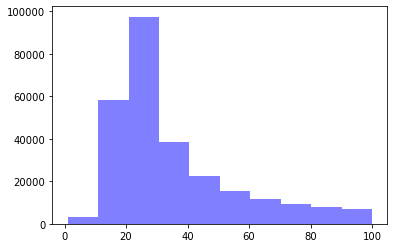

In [46]:
import matplotlib.pyplot as plt
x=users_i_counts.values[123365:]
plt.hist(x, 10, facecolor='blue', alpha=0.5)
plt.show()

In [45]:
sum(users_i_counts.values>100)

123365

In [43]:
users_i_counts.values[44264]

500

In [20]:
user_list[393568:]

Int64Index([ 522534363,  960124825, 1777952220, 1946651368, 1527175400,
             466138434,  689648552, 2119645200,  121434886, 1308159756,
            1760563924, 1977213781,  998428645, 1869558407, 1056509753,
              19887248,  834391458, 1181377042, 1019843964, 1621908707,
            1632816630, 1524550779, 1394917844,  689928881, 2053688599,
            1231833900, 1071441751,  437020401,  346289863, 2103184240,
            1390768116, 1038928152,  108605579, 1032404821,  118250768,
            1130173998,   60215278,    1880240, 1610758750,  232747329,
            1801712607, 1253491979,  190075469,  470439521, 1371686616,
            1871319778,  220576717,  594429989, 1905136258, 1409178561,
             522833851,  505065481, 2019867894,  142134372,  471209091,
             863504442, 1944937154, 1940480669, 1320722105, 1401661034,
             286698831,   48251651,  719804730,  122687953, 1137880031,
            1180748321, 1240997940,  618733771,  866605366,  694

In [32]:
for user in user_list[393568:]:
    print(sum(minus_ele_dict[user]))

3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [11]:
data[data.user_id ==115][-1:]#.answered_correctly.values[0]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
45,45,668090043,115,3364,False,41,1,1,14333.0,False


In [15]:
print(user_num_dict[115]-minus_num_dict[115])
print(user_ele_dict[115]-minus_ele_dict[115])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0

In [16]:
questions_data[questions_data.question_id==3364]

,question_id,tags,vec
3364,3364,136 103 29,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
